<a href="https://colab.research.google.com/github/EteimZ/Deep_Learning-Notebooks/blob/main/Pytorch/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

![CNN](https://pythonmachinelearning.pro/wp-content/uploads/2017/09/lenet-5.png.webp)


Convolutional Neural Network(CNN) also known as ConvNet are a type of neural network architecture used mostly used for image classification.

They consist of 3 types of layers:

1. convolution layers: These layers are what give CNNs their name and special quality, They are basically filters that highlight various path of an image.

2. pooling layers: These layers down sample an image making it smaller.

3. fully connected layers: These are the regular layers from feed forward neural networks that consist of input layers, activations and output layers.

In [8]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

Lets set the transformation for our data, first we convert the data(which is an image) to a tensor then we normalize each channel of the image.

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
#Getting data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

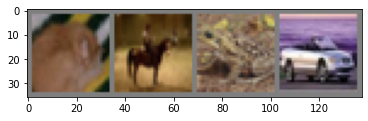

  cat horse  frog   car


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Network

Like I said earlier CNNs have three types of layers, to design our network we have to set our hyper-parameters. In other to get the number of input features of our first fully connected layer we need a formula.

$$O = \frac{n -f+2p}{s} + 1$$

where, $n$ is the in_features, $f$ is the filter, $p$ is the padding and $s$ is the stride.

In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #import pdb; pdb.set_trace()
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [22]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training

In [24]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.097
[1,  4000] loss: 1.755
[1,  6000] loss: 1.636
[1,  8000] loss: 1.551
[1, 10000] loss: 1.504
[1, 12000] loss: 1.439
[2,  2000] loss: 1.376
[2,  4000] loss: 1.323
[2,  6000] loss: 1.305
[2,  8000] loss: 1.285
[2, 10000] loss: 1.275
[2, 12000] loss: 1.245
[3,  2000] loss: 1.176
[3,  4000] loss: 1.172
[3,  6000] loss: 1.183
[3,  8000] loss: 1.169
[3, 10000] loss: 1.163
[3, 12000] loss: 1.145
[4,  2000] loss: 1.079
[4,  4000] loss: 1.066
[4,  6000] loss: 1.063
[4,  8000] loss: 1.086
[4, 10000] loss: 1.071
[4, 12000] loss: 1.072
[5,  2000] loss: 0.987
[5,  4000] loss: 0.989
[5,  6000] loss: 1.014
[5,  8000] loss: 1.043
[5, 10000] loss: 1.010
[5, 12000] loss: 0.998
Finished Training


# Testing


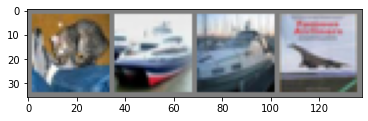

GroundTruth:    cat  ship  ship plane


In [32]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [33]:
outputs = net(images)

In [34]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [35]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %
